<a href="https://colab.research.google.com/github/aminyG/PCVK_Ganjil_2023/blob/main/Week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Drive access
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


#### 2. Implement 6 template matching methods in OpenCV using the cats_and_bunnies.jpg and cat2_templatejpg.jpg images as templates.

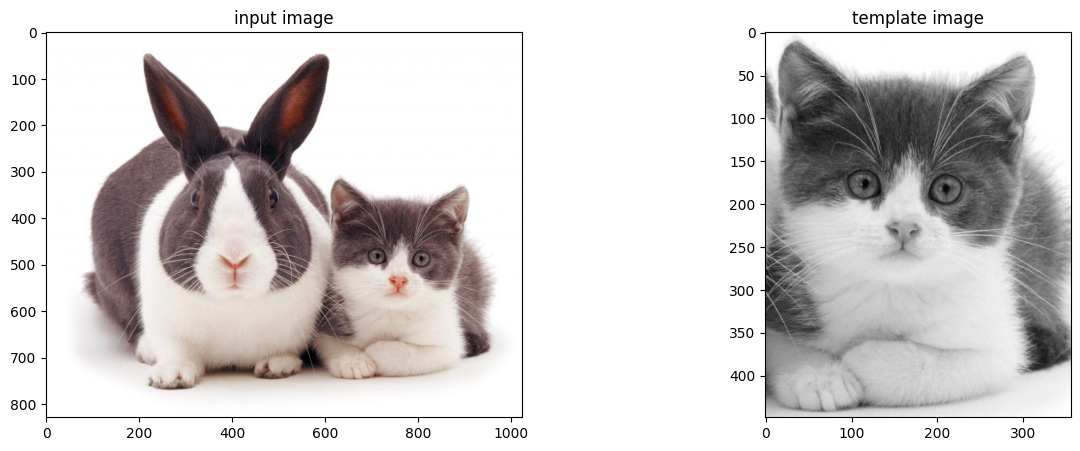

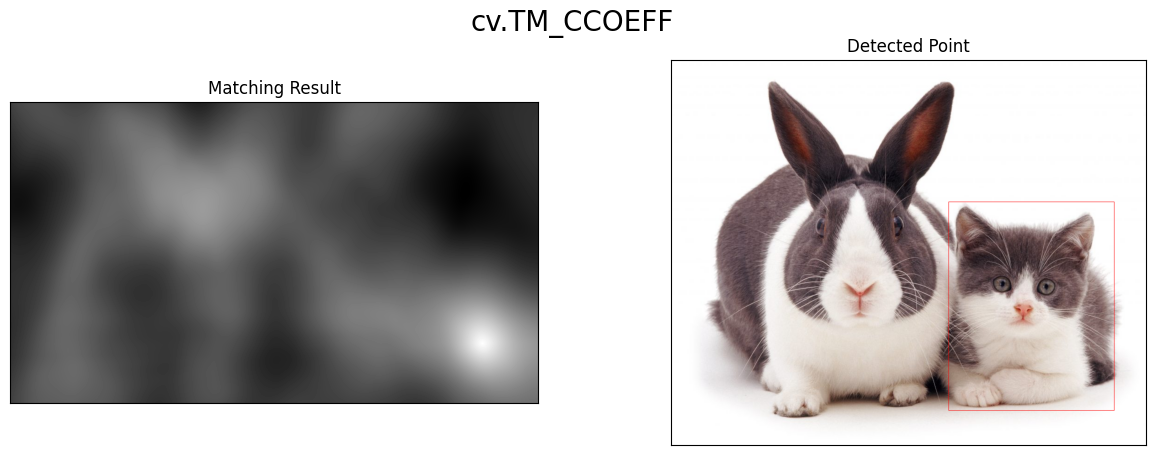

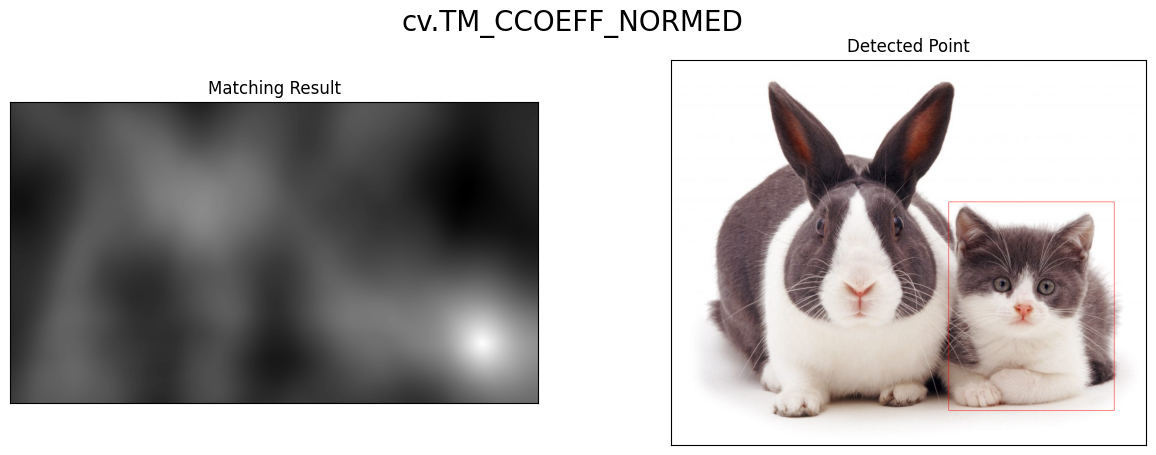

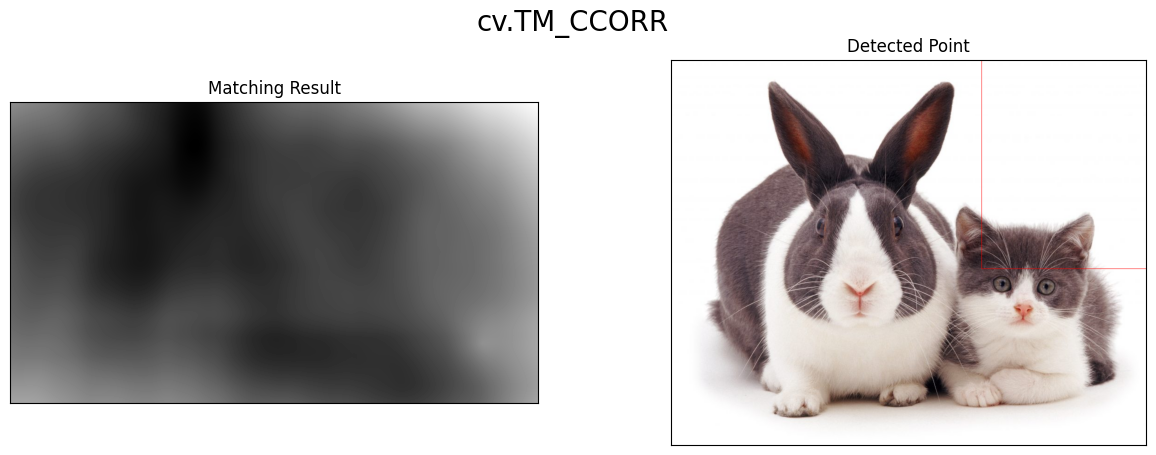

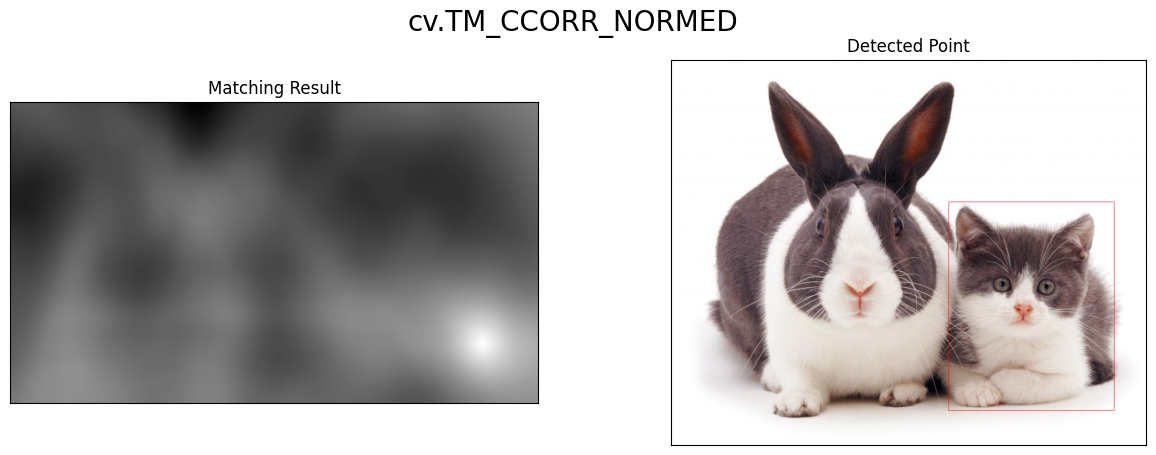

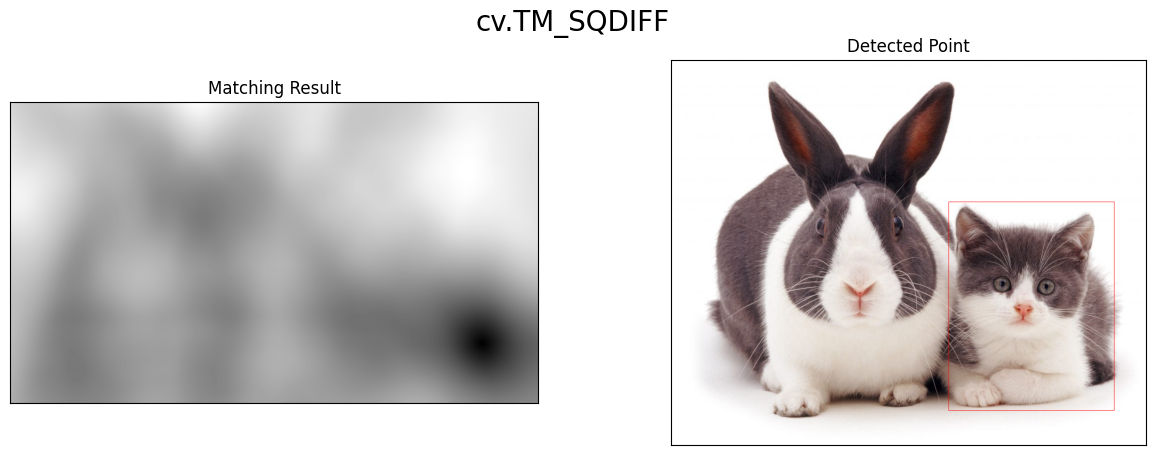

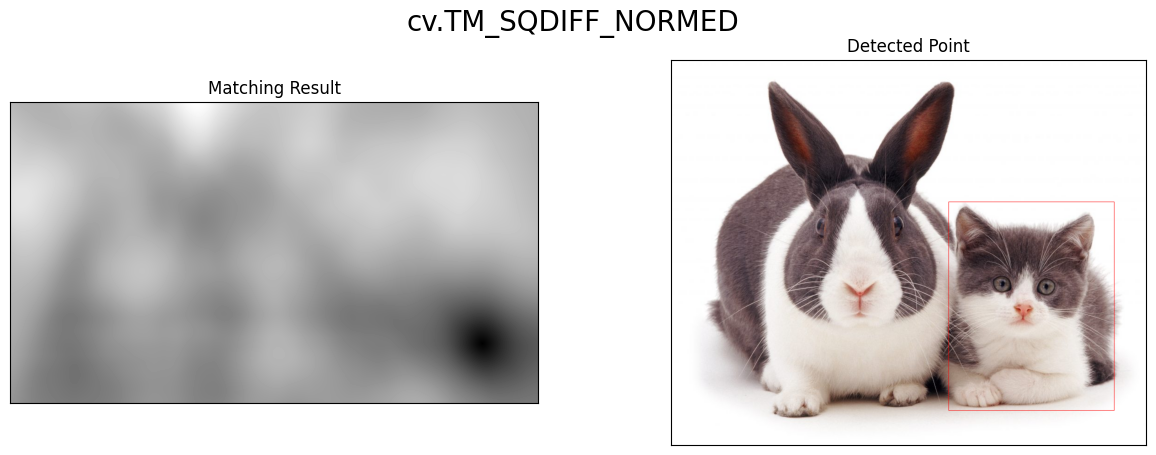

In [4]:
# load input image
img = cv.imread('/content/drive/MyDrive/pcvk/photo/Object Detection/cats_and_bunnies.jpg')
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img2 = img.copy()

#load template image
template = cv.imread('/content/drive/MyDrive/pcvk/photo/Object Detection/cat2_templatejpg.jpg',0)
# image dimensions
w, h = template.shape[::-1]

# print input image and template
f, axarr = plt. subplots(1,2,figsize=(15,5)) #create 2 plots for input image and template
axarr[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)), axarr[0].set_title("input image")
axarr[1].imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB)), axarr[1].set_title("template image")

# All the 6 methods for comparison in a list
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv.matchTemplate(img_gray,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv.rectangle(img,top_left, bottom_right,(0,0,255))
    plt.figure(figsize=(15,5))
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    print("\n\n")
    plt.suptitle(meth, fontsize=20)
    plt.show()

#### 3. Implementasikan konsep template matching tanpa menggunakan library OpenCV untuk multiple object, menggunakan gambar bahrain.jpg untuk citra masukan dan bahrain-template.jpg sebagai citra template, sehingga menghasilkan output sebagai berikut:

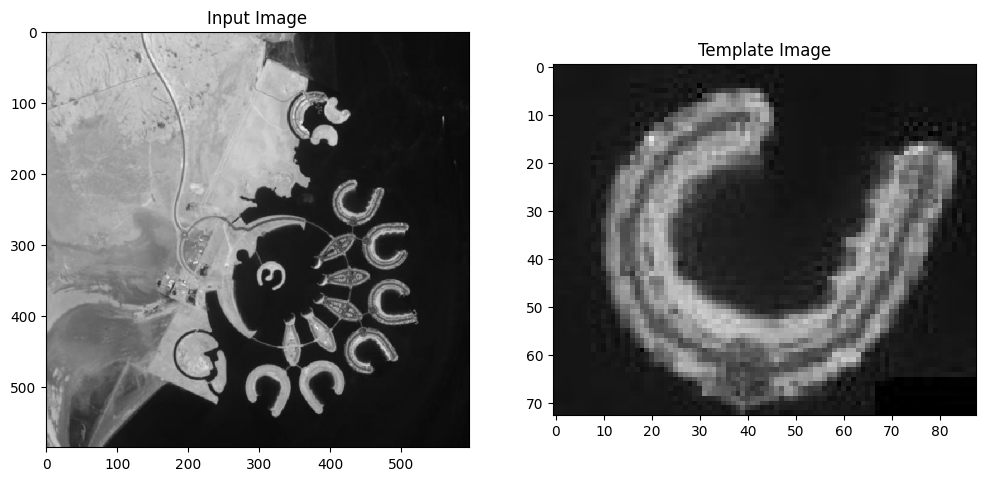

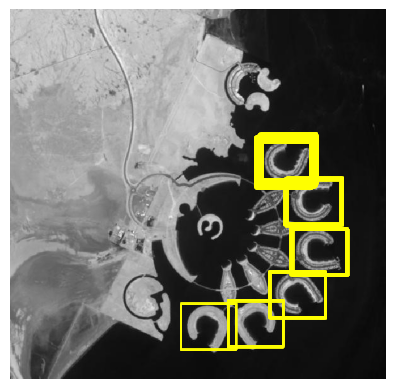

In [7]:
from skimage.feature import match_template

img = cv.imread('/content/drive/MyDrive/pcvk/photo/Object Detection/bahrain.jpg', 0)
template = cv.imread('/content/drive/MyDrive/pcvk/photo/Object Detection/bahrain-template.jpg', 0)

f, axarr = plt. subplots(1,2,figsize=(12,8))
axarr[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)), axarr[0].set_title("Input Image")
axarr[1].imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB)), axarr[1].set_title("Template Image")

# Hitung kemiripan citra dengan citra template
result = match_template(img, template)

# Tentukan threshold untuk menentukan hasil match
threshold = 0.45
locations = np.where(result >= threshold)

# Plot hasil match
fig, ax = plt.subplots()
ax.imshow(img, cmap=plt.cm.gray)
ax.set_axis_off()
height, width = template.shape
for loc in zip(*locations[::-1]):
    rect = plt.Rectangle(loc, width, height, edgecolor='yellow', facecolor='none', linewidth=0.5)
    ax.add_patch(rect)

plt.show()

#### 3. Implement the Sobel Edge Detection, Canny Edge Detection, and Laplacian Edge Detection methods in OpenCV using the parking-lot-cars.jpg image, resulting in the following output:


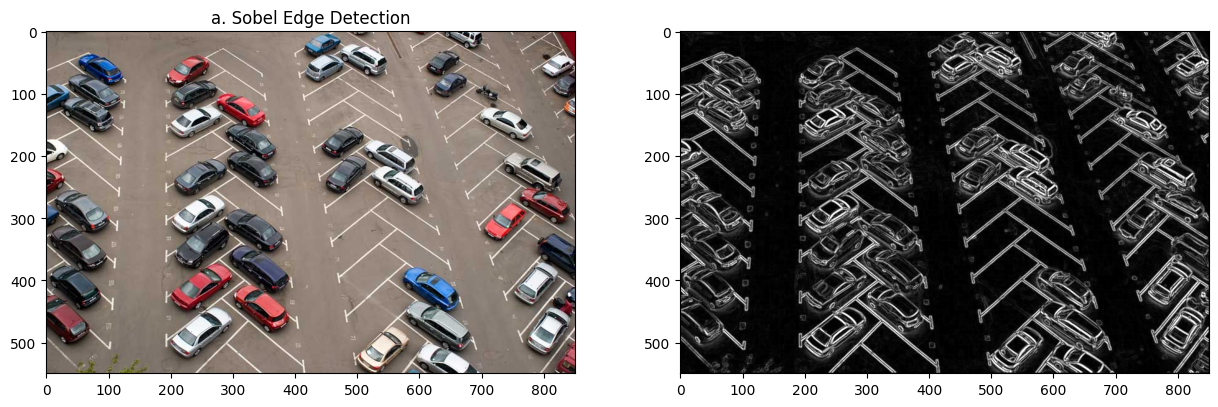

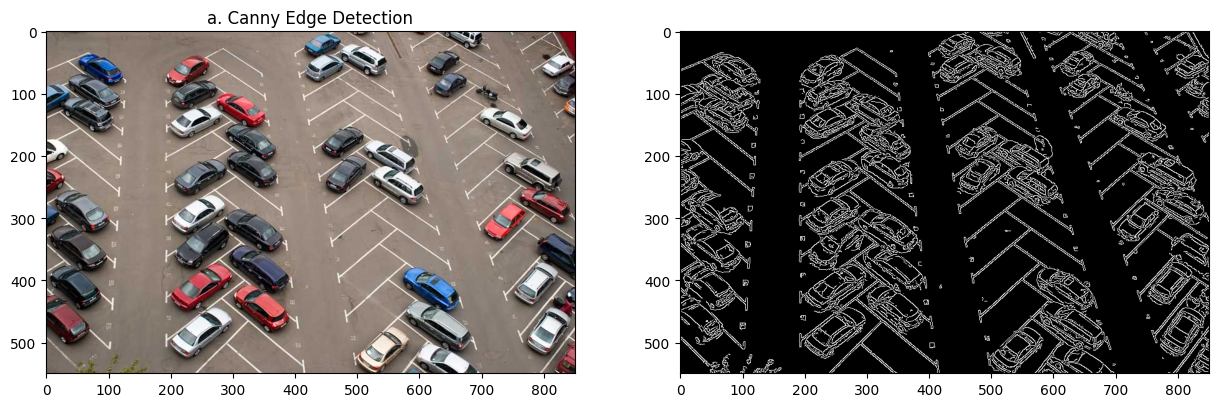

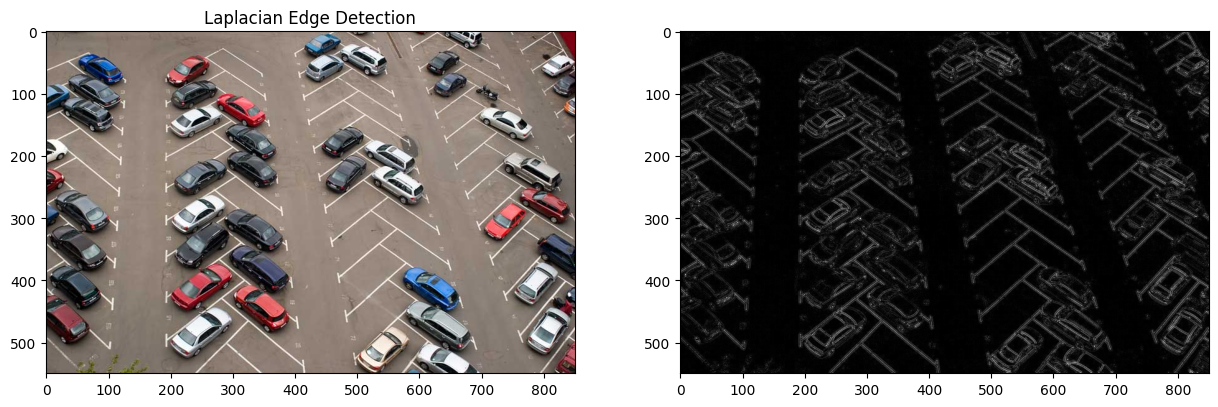

In [22]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img0 = cv.imread('/content/drive/MyDrive/pcvk/photo/Object Detection/parking-lot-cars.jpg')

# a. Sobel Edge Detection

# converting to gray scale
gray = cv.cvtColor(img0, cv.COLOR_BGR2GRAY)

# remove noise
img = cv.GaussianBlur(gray, (3, 3), 0)

# obtaining a horizontal and vertical Sobel filtering of the image
img_sobelx = cv.Sobel(img, cv.CV_64F, 1, 0, ksize=3)
img_sobely = cv.Sobel(img, cv.CV_64F, 0, 1, ksize=3)

# image with both horizontal and vertical Sobel kernels applied
img_sobelxy = cv.addWeighted(cv.convertScaleAbs(img_sobelx), 0.5, cv.convertScaleAbs(img_sobely), 0.5, 0)

f, axarr = plt.subplots(1, 2, figsize=(15, 5))
plt.subplot(121), plt.imshow(cv.cvtColor(img0, cv.COLOR_BGR2RGB))
axarr[0].imshow(cv.cvtColor(img0, cv.COLOR_BGR2RGB))
axarr[0].set_title('a. Sobel Edge Detection')
plt.subplot(122), plt.imshow(img_sobelxy, cmap='gray')
axarr[1].imshow(cv.cvtColor(img_sobelxy, cv.COLOR_BGR2RGB))

# b. Canny Edge Detection

edged = cv.Canny(img0, 100, 200)

# Plot outputs
f, axarr = plt.subplots(1,2,figsize=(15,5))
plt.subplot(121), plt.imshow(cv.cvtColor(img0, cv.COLOR_BGR2RGB))
axarr[0].imshow(cv.cvtColor(img0, cv.COLOR_BGR2RGB))
axarr[0].set_title('a. Canny Edge Detection')
plt.subplot(122), plt.imshow(edged, cmap = 'gray')
axarr[1].imshow(cv.cvtColor(edged, cv.COLOR_BGR2RGB))

# c. Laplacian Edge Detection
f, axarr = plt.subplots(1,2,figsize=(15,5))
img_laplacian = cv.Laplacian(img, cv.CV_64F)
img_laplacian = cv.convertScaleAbs(img_laplacian)
axarr[0].imshow(cv.cvtColor(img0, cv.COLOR_BGR2RGB))
axarr[0].set_title('Laplacian Edge Detection')
axarr[1].imshow(img_laplacian, cmap='gray')
plt.show()


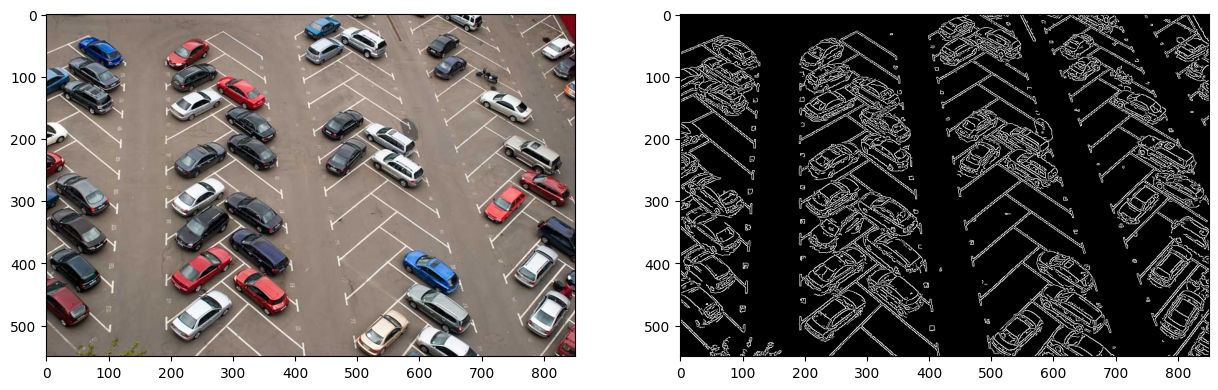

In [17]:

image_original = cv.imread('/content/drive/MyDrive/PCVK/Images/Object Detection/parking-lot-cars.jpg', cv.IMREAD_COLOR)
image_gray = cv.cvtColor(image_original, cv.COLOR_BGR2GRAY)
img = cv.GaussianBlur(image_gray,(3,3),0)

filtered_image = cv.Laplacian(img, ksize=3, ddepth=cv.CV_16S)

filtered_image = cv.convertScaleAbs(filtered_image)

(fig, (ax1, ax2)) = plt.subplots(1, 2, figsize=(15, 15))
ax1.title.set_text('Original Image')
ax1.imshow(image_original)
ax2.title.set_text('Laplacian Filtered Image')
ax2.imshow(filtered_image, cmap='gray')